# This script demostrates the K-means algorithm

## Name : Yong-Ho Ahn

## Student ID : 20132465

## import packages for plotting graphs and manipulate data
### and write matplotlib incline for plot error

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

### define checking function for pick random integer 

In [2]:
def compare(array,a):
    y=len(array)
    for i in range(0,y):
        if a==array[i]:
            return 1
    return 0

### define distance function for centroid from input data

In [3]:
def distance(a,b):
    c=b-a
    d=c*c
    result=np.sqrt(sum(d))
    return result

### define Min function for check the minimum length distance

In [4]:
def Min(num,count):
    result=num[0]
    index=0
    for i in range(0, count):
        if result>=num[i]:
            result=num[i]
            index=i
    return result, index

### make random integer groups a {a=1~100}, 
### a has 25 number
### make k_num for 4 gropus labeling

In [5]:
a= np.random.randint(1,100,(25,2))
a= np.float32(a)
K_num= 4

### make k and  array
### make b as a init cluster point
### using compare function for check the random number
### if two numbers are same count-1, else count+1
### numcount for check 4 grouping end

In [6]:
K=[]
array=[]
numcount=0
while True:
    b=random.randint(0,len(a))
    check = compare(array,b)
    if check == 0:
        array.append(b)
        K.append(a[b])
        numcount=numcount+1
    else:
        numcount=numcount-1
    if numcount == K_num:
        break
K=np.array(K)

### clustering 6 times max
### check minimum value of the total distance
### update the K[ ] for minimum value for average distance
### assign the label to be minimum weight

In [7]:
for re in range(0,6):
    Dis=[]
    for i in range(0,len(a)):
        temp = []
        for j in range(0,K_num):
            temp.append(distance(K[j],a[i]))
        Dis.append(temp)
        
    index=[]
    
    for i in range(0,len(a)):
        m,n=Min(Dis[i],K_num)
        index.append(n)
  
    for j in range(0, K_num):
        tempsum=np.array([0,0])
        count=0
        for i in range(0, len(a)):
            if index[i] == j:
                tempsum = tempsum+ a[i]
                count = count + 1
        
        if count == 0:
            K[j] = np.array([0,0])
        else:
            K[j] = tempsum/count

### plot the graph of energy changing(for case 1)

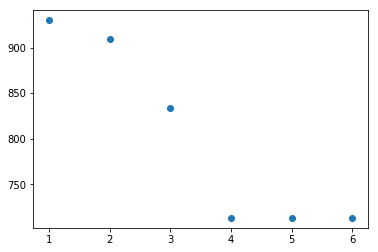

In [8]:
plt.figure(2)
x_values = [1,2,3,4,5,6]
y_values = [930,909,834,713,713,713]
plt.scatter(x_values, y_values)
plt.show()

## plot the graph end of clustering(final centroid = black, final label = another colors)

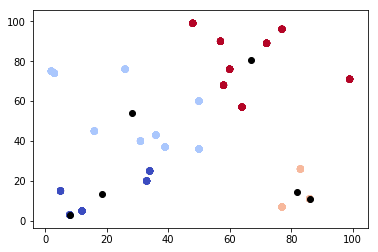

In [9]:
for i in range(0,len(a)):
    plt.scatter(a[:,0], a[:,1], c=index, cmap=plt.cm.coolwarm)
plt.figure(1)
plt.scatter(K[:,0],K[:,1],c='k')
plt.show()

## github : https://github.com/anyongho/assignment03